In [2]:
import torch
from torch import nn  #this includes all the building blocks for neual networks
import matplotlib.pyplot as plt


In [3]:
torch.__version__

'2.1.2'

In [5]:
weights=0.7
bias=0.3

#create data
start=0
end=1
step=0.02

x=torch.arange(start,end,step).unsqueeze(dim=1)
y=weights*x + bias
x[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [7]:
#create a train/test split
train_split=int(0.8*len(x))
x_train,y_train=x[:train_split],y[:train_split]
x_test,y_test=x[train_split:],y[train_split:]
print(len(x_train))
print(len(x_test))

40
10


In [8]:
def plot_predictions(x_train=x_train,
                     y_train=y_train,
                     x_test=x_test,
                     y_test=y_test,
                     predictions=None):
  '''this plots the training,testing and prediction of the model'''
  plt.figure(figsize=(10,7))

  #visualizing the training data
  plt.scatter(x_train,y_train,c="b",s=4,label="training data");
  #visualizing the testing set of the data
  plt.scatter(x_test,y_test,c="g",s=6,label="testing label");
  if (predictions is not None):

    '''displays the difference between actual and predicted'''
    
    plt.scatter(y_test,predictions,c="r",label="predictions",s=4);
  plt.legend(prop={"size":14});

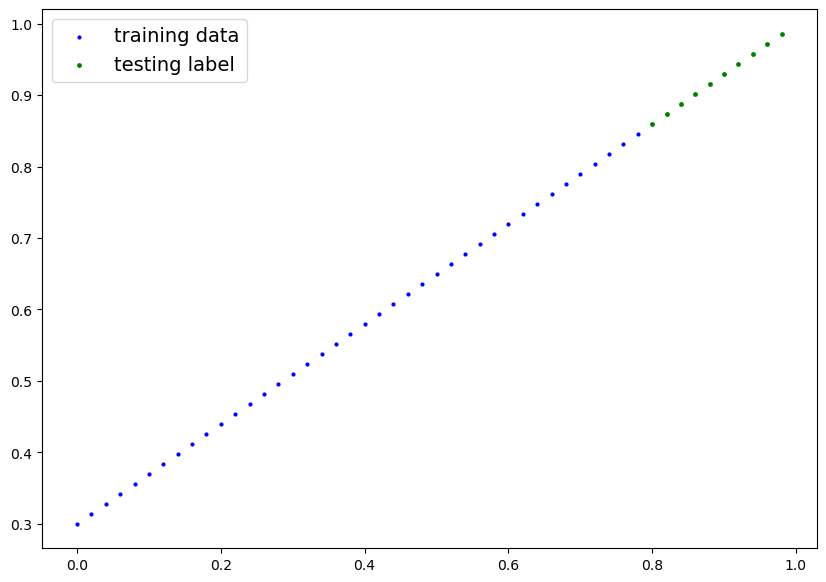

In [9]:
plot_predictions(x_train,y_train,x_test,y_test)

In [10]:
from torch import nn

class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights=nn.Parameter(torch.randn(1,
                               dtype=torch.float32),
                              requires_grad=True)
    
    self.bias=nn.Parameter(torch.randn(1,
                            dtype=torch.float32),requires_grad=True)
    
  def forward(self,x:torch.Tensor)->torch.Tensor:
    return (x*self.weights+self.bias)
  

In [11]:
#create a random seed
torch.manual_seed(42)
model=LinearRegressionModel()
model

LinearRegressionModel()

In [12]:
#lets look at the models parameters
list(model.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [13]:
# lets see the values of the model
model.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [14]:
# lets see what the model predicts know with our training
with torch.inference_mode():
  y_preds=model(x_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

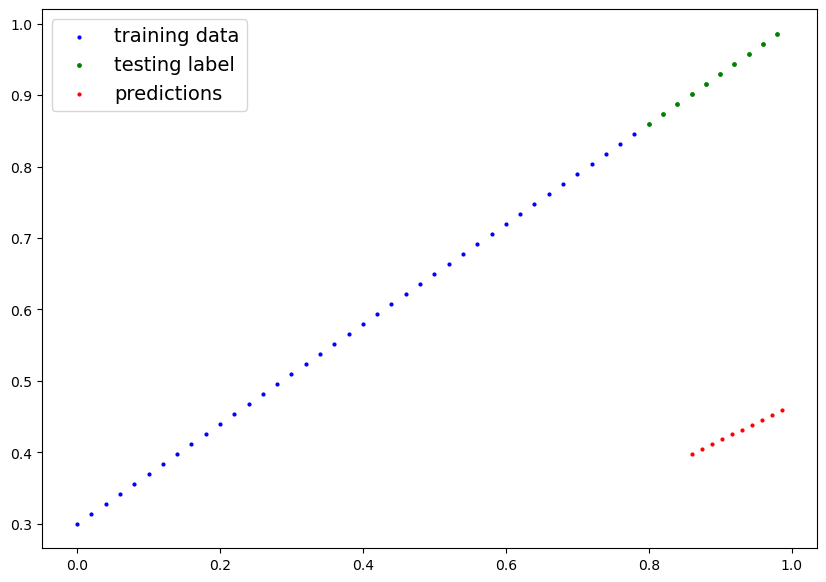

In [15]:
#visualizing the difference between actual and predicted labels
plot_predictions(predictions=y_preds)